# Business Understanding

## Introduction

The telecom company has provided access to three different datasets for a classification project. The first dataset consists of 3000 records and is stored in a remote database hosted on Microsoft SQL Server. The second dataset contains 2000 records and is stored on OneDrive. The third dataset is hosted on a GitHub repository.

## Objectives of the project

To assist the telecom company understand their data: The project aims to provide insights into the telecom company's data, including customer demographics, services availed, and payment details. This understanding will enable the company to make informed business decisions.

Find the lifetime value of each customer: By analyzing the data, the project aims to identify factors that influence the rate at which customers churn. Understanding customer behavior and identifying key predictors will help the telecom company estimate the lifetime value of each customer.

Predict customer churn: The project involves developing a predictive model to determine whether a customer is likely to churn or not. By using machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., the project aims to build a model that accurately predicts customer churn.

## Methodology

To achieve these objectives, the project will follow the CRISP-DM framework and involve the following steps:

Data exploration: Explore the datasets to gain insights into the available variables, their distributions, and relationships. This step will provide an initial understanding of the data and help identify any data quality issues.

Missing value computations: Identify missing values in the datasets and decide on an appropriate strategy for handling them, such as imputation or removal of missing data points.

Feature engineering: Perform feature engineering to transform and create new variables that can potentially improve the predictive power of the models. This step may involve encoding categorical variables, scaling numerical variables, or creating interaction terms.

Model development: Utilize machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to develop predictive models for customer churn. Train the models on a subset of the data and evaluate their performance using appropriate metrics.

Model evaluation and interpretation: Evaluate the trained models using evaluation metrics such as accuracy, precision, recall, and F1-score. Interpret the models to understand the factors driving customer churn and their relative importance.

Model optimization and hyperparameter tuning: Fine-tune the models by optimizing their hyperparameters to improve their performance. This step may involve techniques like grid search or random search to find the optimal combination of hyperparameters.

## Hypothesis
H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their demographics, services, and payment methods.
H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

## Questions
1. Is there a relationship between the monthly charges and the likelihood of churn?
2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?
3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?
4. How does the churn rate vary based on the customers' gender?
5. Does the presence of a partner influence the likelihood of churn?
6. Is there a correlation between the tenure of customers and their churn rate?

# Data Understanding

## Load Datasets

In [139]:
# Import necessary libraries
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings("ignore")
# Modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
# Prediction
from sklearn.metrics import confusion_matrix

In [140]:
# Establish a connection
server = 'dap-projects-database.database.windows.net'
database = 'dapDB'
username = 'dataAnalyst_LP2'
password = 'A3g@3kR$2y'

conn_str = f'DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
conn = pyodbc.connect(conn_str)


### Load first dataset (database file)

In [141]:
# Query the database to retrieve the data
query = 'SELECT TOP 3000 * FROM LP2_Telco_churn_first_3000'
df_db = pd.read_sql(query, conn)


In [142]:
# Close connection
conn.close()


### Load second dataset (test file)

In [143]:
# Read the excel file into a pandas dataframe
df_test = pd.read_excel('Telco-churn-second-2000.xlsx')


### Load third dataset (csv file)

In [144]:
# Read third dataset
df_csv = pd.read_csv('LP2_Telco-churn-last-2000.csv')

# Data Exploration

## Preprocessing

In [145]:
# View the datasets (df_db)
df_db

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


In [146]:
# View the datasets (df_csv)
df_csv

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [147]:
# View the datasets (df_test)
df_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [148]:
# Shapes of the datasets (number of rows and columns in each dataset)
print(df_db.shape)
print(df_csv.shape)
print(df_test.shape)

(3000, 21)
(2043, 21)
(2000, 20)


In [149]:
# Check uniqueness of non-numeric columns in df_db
 
# List of columns to get unique values from
non_numeric_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod', 'Churn']

# Iterate over the columns and print unique values
print("df_db unique values")
for column in non_numeric_columns:
    unique_values = df_db[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()
print("\n")
print("df_csv uniques values")
for column in non_numeric_columns:
    unique_values = df_csv[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()
print("\n")
print("df_test unique values")
non_numeric_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                       'PaymentMethod']
# Iterate over the columns and print unique values
for column in non_numeric_columns:
    unique_values = df_test[column].unique()
    print(f"Unique values in column {column}:")
    print(unique_values)
    print()

df_db unique values
Unique values in column gender:
['Female' 'Male']

Unique values in column SeniorCitizen:
[False  True]

Unique values in column Partner:
[ True False]

Unique values in column Dependents:
[False  True]

Unique values in column PhoneService:
[False  True]

Unique values in column MultipleLines:
[None False True]

Unique values in column InternetService:
['DSL' 'Fiber optic' 'No']

Unique values in column OnlineSecurity:
[False True None]

Unique values in column OnlineBackup:
[True False None]

Unique values in column DeviceProtection:
[False True None]

Unique values in column TechSupport:
[False True None]

Unique values in column StreamingTV:
[False True None]

Unique values in column StreamingMovies:
[False True None]

Unique values in column Contract:
['Month-to-month' 'One year' 'Two year']

Unique values in column PaperlessBilling:
[ True False]

Unique values in column PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit car

In [150]:
# Check the data types
print("df_db data types")
print(df_db.dtypes)
print("\n")
print("df_csv data types")
print(df_csv.dtypes)
print("\n")
print("df_test data types")
print(df_test.dtypes)

df_db data types
customerID           object
gender               object
SeniorCitizen          bool
Partner                bool
Dependents             bool
tenure                int64
PhoneService           bool
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling       bool
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


df_csv data types
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          obje

In [151]:
# Convert TotalCharges column in df_test to float64
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'], errors='coerce')

# Check the data type after conversion
print("df_test Data Types:")
print(df_test.dtypes)
print("\n")

# Convert TotalCharges column in df_csv to float64
df_csv['TotalCharges'] = pd.to_numeric(df_csv['TotalCharges'], errors='coerce')

# Check the data type after conversion
print("df_csv Data Types:")
print(df_csv.dtypes)

df_test Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
dtype: object


df_csv Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          

In [152]:
# Summary statistics
print("df_db summary stats")
print(df_db.describe())
print("\n")
print("df_csv summary stats")
print(df_csv.describe())
print("\n")
print("df_test summary stats")
print(df_test.describe())

df_db summary stats
            tenure  MonthlyCharges  TotalCharges
count  3000.000000     3000.000000   2995.000000
mean     32.527333       65.347400   2301.278315
std      24.637768       30.137053   2274.987884
min       0.000000       18.400000     18.799999
25%       9.000000       35.787499    415.250000
50%      29.000000       70.900002   1404.650024
75%      56.000000       90.262501   3868.725098
max      72.000000      118.650002   8564.750000


df_csv summary stats
       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    2043.000000  2043.000000     2043.000000   2040.000000
mean        0.168380    32.649046       64.712555   2303.214681
std         0.374295    24.376248       29.970010   2261.934905
min         0.000000     0.000000       18.550000     18.850000
25%         0.000000     9.000000       35.825000    434.250000
50%         0.000000    30.000000       70.250000   1398.275000
75%         0.000000    55.000000       89.625000   3846.962500
max 

In [154]:
### Handling Missing Values
# Analyze missing values in df_db
missing_values_db = df_db.isnull().sum()
missing_percentage_db = (missing_values_db / len(df_db)) * 100
missing_summary_db = missing_values_db.astype(str) + " (" + missing_percentage_db.round(2).astype(str) + "%)"

# Analyze missing values in df_csv
missing_values_csv = df_csv.isnull().sum()
missing_percentage_csv = (missing_values_csv / len(df_csv)) * 100
missing_summary_csv = missing_values_csv.astype(str) + " (" + missing_percentage_csv.round(2).astype(str) + "%)"

# Analyze missing values in df_test
missing_values_test = df_test.isnull().sum()
missing_percentage_test = (missing_values_test / len(df_test)) * 100
missing_summary_test = missing_values_test.astype(str) + " (" + missing_percentage_test.round(2).astype(str) + "%)"

# Print the missing values information
print("Missing Values in df_db:")
print(missing_summary_db)
print()

print("Missing Values in df_csv:")
print(missing_summary_csv)
print()

print("Missing Values in df_test:")
print(missing_summary_test)
print()


Missing Values in df_db:
customerID             0 (0.0%)
gender                 0 (0.0%)
SeniorCitizen          0 (0.0%)
Partner                0 (0.0%)
Dependents             0 (0.0%)
tenure                 0 (0.0%)
PhoneService           0 (0.0%)
MultipleLines       269 (8.97%)
InternetService        0 (0.0%)
OnlineSecurity      651 (21.7%)
OnlineBackup        651 (21.7%)
DeviceProtection    651 (21.7%)
TechSupport         651 (21.7%)
StreamingTV         651 (21.7%)
StreamingMovies     651 (21.7%)
Contract               0 (0.0%)
PaperlessBilling       0 (0.0%)
PaymentMethod          0 (0.0%)
MonthlyCharges         0 (0.0%)
TotalCharges          5 (0.17%)
Churn                 1 (0.03%)
dtype: object

Missing Values in df_csv:
customerID           0 (0.0%)
gender               0 (0.0%)
SeniorCitizen        0 (0.0%)
Partner              0 (0.0%)
Dependents           0 (0.0%)
tenure               0 (0.0%)
PhoneService         0 (0.0%)
MultipleLines        0 (0.0%)
InternetService      0

df_db
Value Counts for MultipleLines:
False    1437
True     1294
Name: MultipleLines, dtype: int64

Value Counts for OnlineSecurity:
False    1478
True      871
Name: OnlineSecurity, dtype: int64

Value Counts for OnlineBackup:
False    1320
True     1029
Name: OnlineBackup, dtype: int64

Value Counts for DeviceProtection:
False    1296
True     1053
Name: DeviceProtection, dtype: int64

Value Counts for TechSupport:
False    1476
True      873
Name: TechSupport, dtype: int64

Value Counts for StreamingTV:
False    1190
True     1159
Name: StreamingTV, dtype: int64

Value Counts for StreamingMovies:
True     1199
False    1150
Name: StreamingMovies, dtype: int64



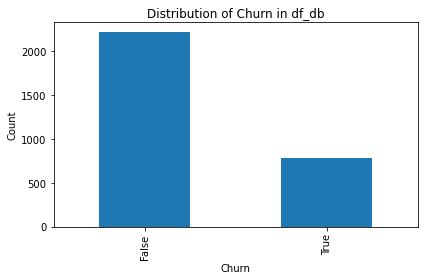

df_csv
Value Counts for MultipleLines:
No                  987
Yes                 836
No phone service    220
Name: MultipleLines, dtype: int64

Value Counts for OnlineSecurity:
No                     1029
Yes                     585
No internet service     429
Name: OnlineSecurity, dtype: int64

Value Counts for OnlineBackup:
No                     911
Yes                    703
No internet service    429
Name: OnlineBackup, dtype: int64

Value Counts for DeviceProtection:
No                     923
Yes                    691
No internet service    429
Name: DeviceProtection, dtype: int64

Value Counts for TechSupport:
No                     996
Yes                    618
No internet service    429
Name: TechSupport, dtype: int64

Value Counts for StreamingTV:
No                     828
Yes                    786
No internet service    429
Name: StreamingTV, dtype: int64

Value Counts for StreamingMovies:
No                     831
Yes                    783
No internet service    42

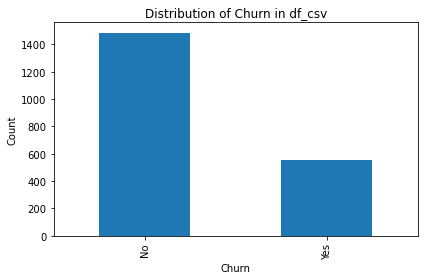

In [158]:
# Assess the data distribution for categorical columns

# Value counts for categorical columns in df_db
print("df_db")
df_db_categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in df_db_categorical_cols:
    print(f"Value Counts for {col}:")
    print(df_db[col].value_counts())
    print()

# Bar plot for categorical column 'Churn' in df_db
df_db['Churn'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn in df_db')
plt.tight_layout()
plt.show()

# Value counts for categorical columns in df_csv
print("df_csv")
df_csv_categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in df_csv_categorical_cols:
    print(f"Value Counts for {col}:")
    print(df_csv[col].value_counts())
    print()

# Bar plot for categorical column 'Churn' in df_csv
df_csv['Churn'].value_counts().plot(kind='bar', figsize=(6, 4))
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Distribution of Churn in df_csv')
plt.tight_layout()
plt.show()


df_db


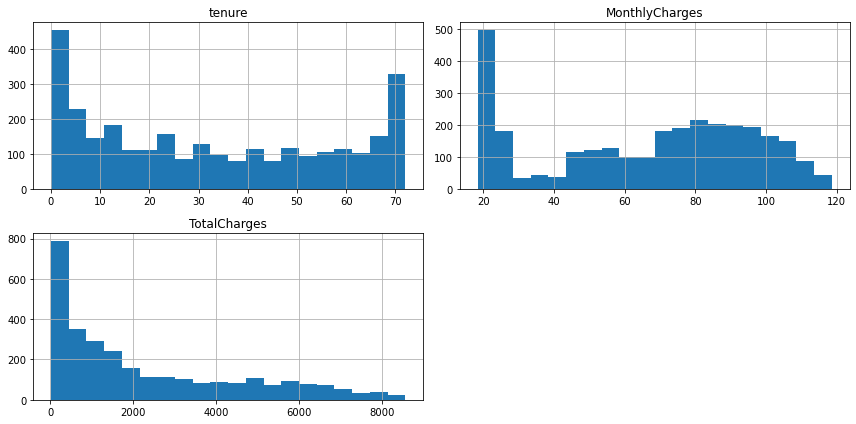

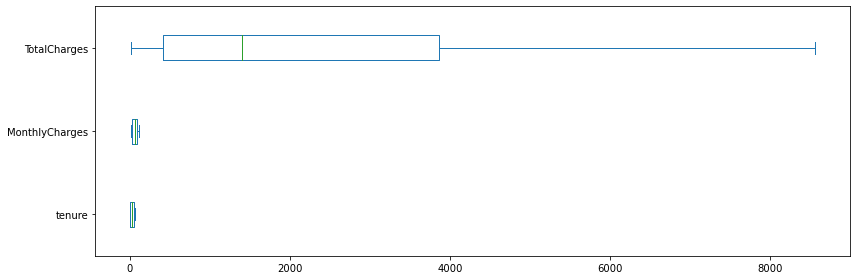

df_csv


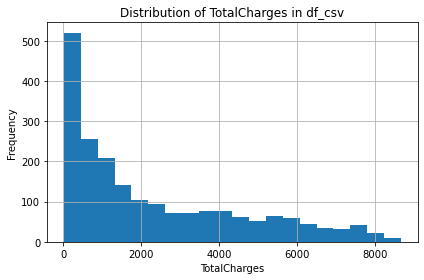

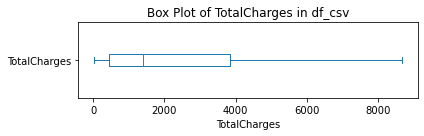

df_test


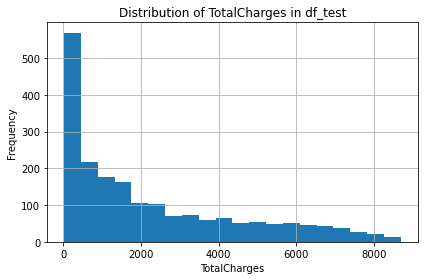

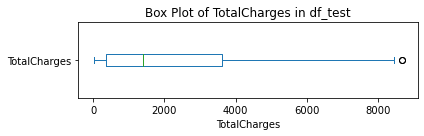

In [156]:
# Examine the distribution of columns with missing values and # assess the presence of outliers

# Assess the data distribution and outliers for numerical columns

# Histograms for numerical columns in df_db
print("df_db")
df_db_numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df_db[df_db_numerical_cols].hist(bins=20, figsize=(12, 6))
plt.tight_layout()
plt.show()

# Box plots for numerical columns in df_db
df_db[df_db_numerical_cols].plot(kind='box', vert=False, figsize=(12, 4))
plt.tight_layout()
plt.show()

# Histogram for TotalCharges in df_csv
print("df_csv")
df_csv['TotalCharges'].hist(bins=20, figsize=(6, 4))
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.title('Distribution of TotalCharges in df_csv')
plt.tight_layout()
plt.show()

# Box plot for TotalCharges in df_csv
df_csv['TotalCharges'].plot(kind='box', vert=False, figsize=(6, 2))
plt.xlabel('TotalCharges')
plt.title('Box Plot of TotalCharges in df_csv')
plt.tight_layout()
plt.show()

# Histogram for TotalCharges in df_test
print("df_test")
df_test['TotalCharges'].hist(bins=20, figsize=(6, 4))
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.title('Distribution of TotalCharges in df_test')
plt.tight_layout()
plt.show()

# Box plot for TotalCharges in df_test
df_test['TotalCharges'].plot(kind='box', vert=False, figsize=(6, 2))
plt.xlabel('TotalCharges')
plt.title('Box Plot of TotalCharges in df_test')
plt.tight_layout()
plt.show()